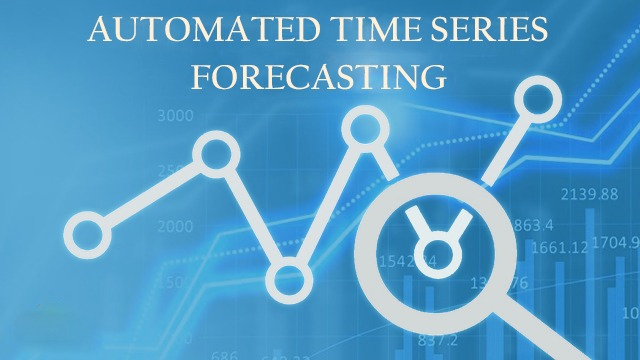

### Time-series forecasting is one of the most common and important tasks in business analytics. The goal of time series modeling is to predict future performance from past behavior – such as sales, stock market, energy demand, weather & many more.

   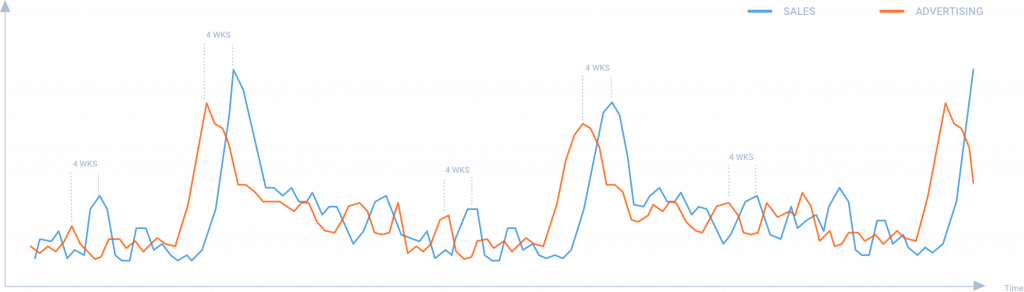

### Manually doing time series modeling can be a complex and laborious process because many historical events can impact the current predictions, and finding the most influential signals is difficult. So, automating all these things will reduce human effort, time, and also able to get quick predictions.

# Time Series Automation (Univariate Forecasting)

### Time Series Automation integrates best practices in time series modeling as it automatically detects nonstationarity data, non-seasonality data and transforms to seasonal and stationary data. Besides methods like ARIMA and Facebook Prophet, this time series automation also includes advanced time series models (LSTM) that help to achieve forecasting data with the least RMSE score.

# Time Series Automation (Multivariate Forecasting)

### Time series Automation is also capable of handling multivariate forecasting through the VARMAX model. If the variables in the time series influence each other, this Automated Time series model is able to predict the series with past values of itself along with other series in the system. It is pretty much mandatory to observe that all the variables (time series) in the data are interchangeably causing each other (Following Granger’s Causality Test) before using VARMAX. If not, the VARMAX Automated model may forecast with higher RMSE scores which lead to bad forecasting results.

# Automated Time Series Forecasting Working Flow:
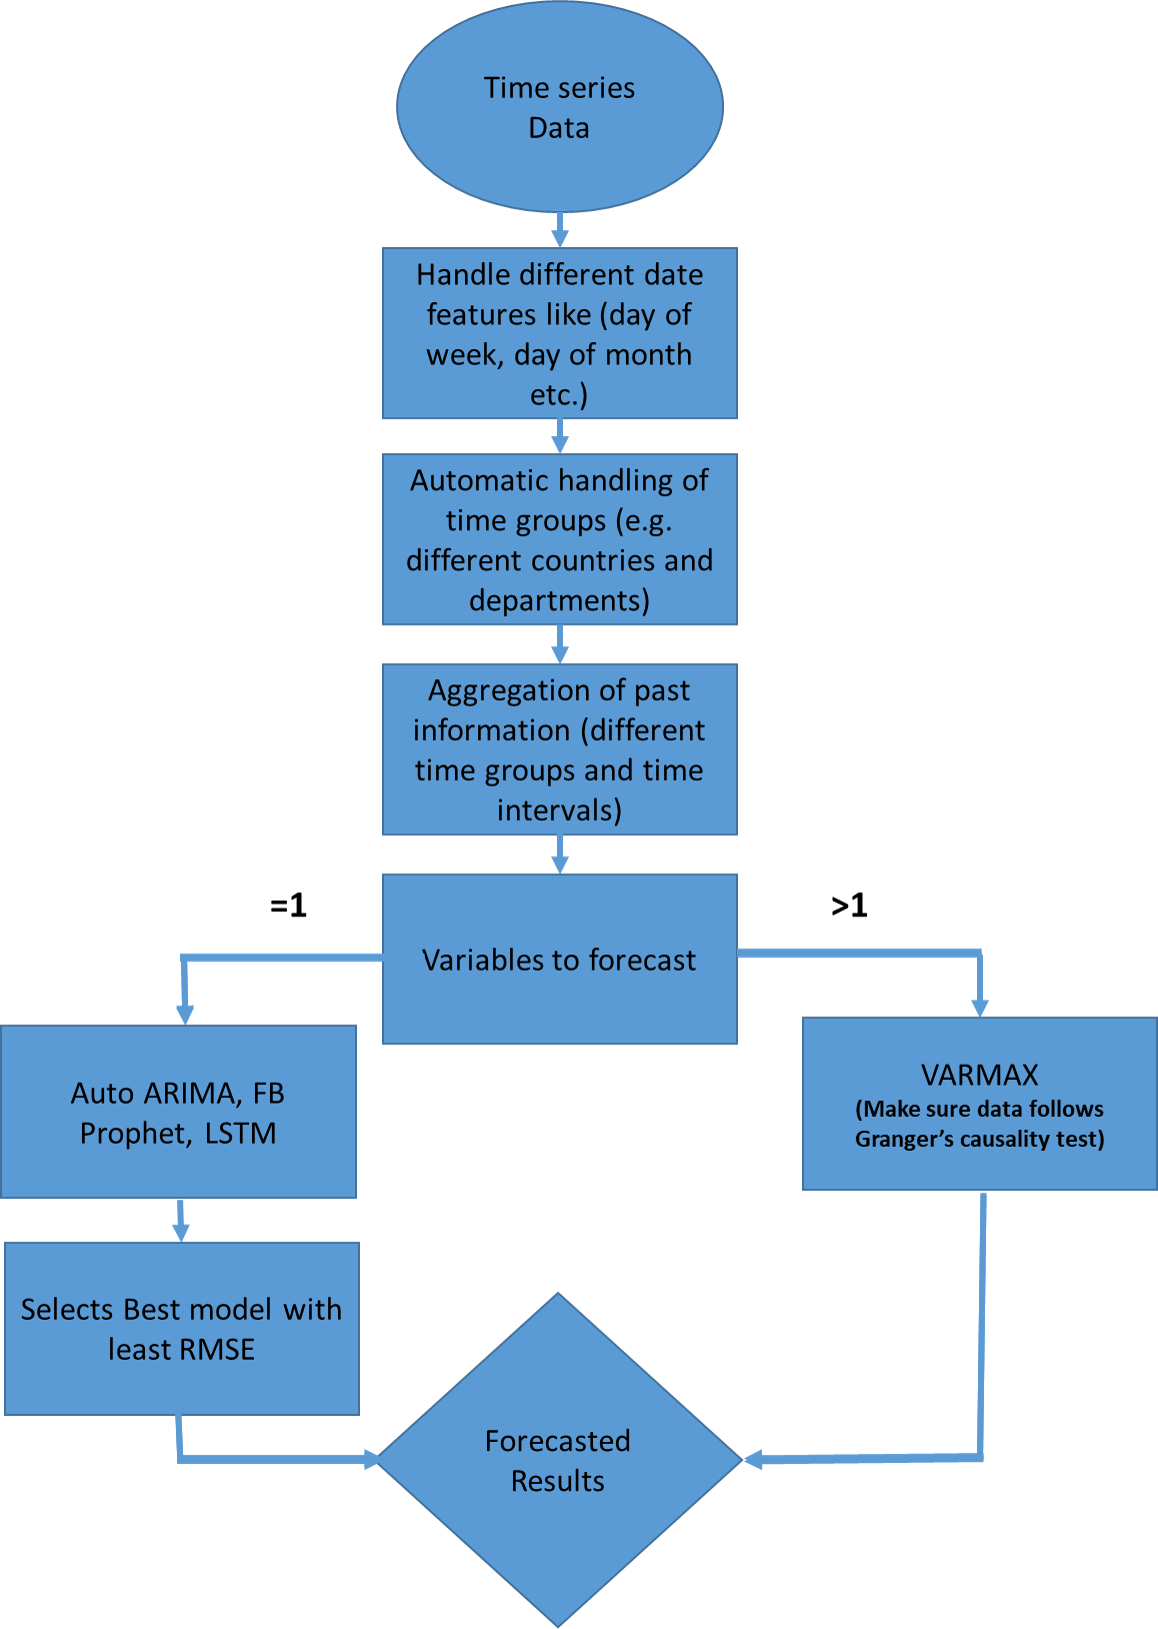

# Please go through the below blog and you will understand how to use this AUTO ML product. You can upload your own time series data set and check the forecasted results.
# Link to upload data set is given at the end of the blog & you can see the forecasted results.
# https://beingdatum.com/profilegrid_blogs/automated-time-series-forecasting/

# **** Automated Time series forecasting code ****

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
std=StandardScaler()
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense,LSTM
from pmdarima import auto_arima
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults

In [ ]:
pip install pmdarima

In [ ]:
d1=str(input('Enter dataset file name : '))
d2=str(input('Enter format of the file "csv" or "excel" : ' ))
print('\n')
if d2=='csv':
    d1=d1+'.csv'
    d3=pd.read_csv(d1)
elif d2=='excel':
    d1=d1+'.xlsx'
    d3=pd.read_excel(d1)
s1=str(input('Enter the column name of the date : '))
print('\n')
d5=pd.read_excel('Dateformats.xlsx')
display(HTML(d5.to_html()))
print('\n')
s2=str(input('Enter the format of the'+' '+s1+' '+'from the above tabel (e.g %d-%Y-%m): ' ))
print('\n')
s3=int(input('Enter the number of features you want to forecast ? : '))
if s3==1:
    s4=str(input('Enter the name of the feature you want to forecast on : '))
    print('\n')
    d3[s1]=pd.to_datetime(d3[s1], format=s2, infer_datetime_format=True)
    
#Code to remove special characters and null values in the forecasting feature
    list1=[]
    list3=[]
    for i in range(len(d3[s4])):
        try:
            list1.append(int(d3[s4][i]))
        
        except:
            list3.append(i)
            continue
    for i in range(len(list3)):
        n2=d3[s4][list3[i]]
        d3[s4].replace(n2,np.nan,inplace=True)
    for i in range(len(d3)):
        d3[s4].fillna(d3[s4].median(),inplace=True)
    d3[s4]=d3[s4].astype(int)

    s5=str(input('Do you want to forecast'+' '+s4+' '+'on any category in the features (eg:- country(India)) or want to forecast'+' '+s4+' '+'on whole (Yes/No) : '))
    print('\n')
    if s5=='No':
        datewise=d3.groupby([s1]).agg({s4:'sum'})
    elif s5=='Yes':
        s6=str(input('Enter the feature name from which who want to pick the category (eg:- country): '))
        s7=str(input('Ente the category name from'+' '+s6+' '+'to forecast'+' '+s4+' '+'  : '))
        s8=d3[d3[s6]==s7]
        datewise=s8.groupby([s1]).agg({s4:'sum'})
        
        
    #ARIMA
    datewise= datewise.astype('float32')
    model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
    valid=datewise.iloc[int(datewise.shape[0]*0.95):]
    n11=pd.infer_freq(datewise.index, warn=True)
    list9=[]
    model_arima= auto_arima(model_train[s4],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
    model_arima.fit(model_train
                [s4])
    prediction_arima=model_arima.predict(len(valid))
    print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(list(valid[s4]),(prediction_arima))))
    list9.append(np.sqrt(mean_squared_error(list(valid[s4]),(prediction_arima))))
    print('\n')
    t=int(input('Enter number of days to forecast ? :'))
    m1=model_arima.order
    model = ARIMA(datewise[s4],order=m1)
    results = model.fit()
    s=t-1
    forecast_arima = results.predict(len(datewise),len(datewise)+t,typ='levels').rename(s4)




    #FB PROPHET   
    datewise1=datewise.reset_index()
    datewise1.rename(columns={s1: 'ds',s4: 'y'},inplace=True)
    train=datewise1.iloc[:int(datewise1.shape[0]*0.95)]
    valid=datewise1.iloc[int(datewise1.shape[0]*0.95):]
    m=Prophet(weekly_seasonality=True)
    m.fit(train)
    future=m.make_future_dataframe(periods=len(valid),freq=n11)
    forecast=m.predict(future)
    predictions=forecast.tail(len(valid))['yhat']
    print('\n')
    print("Root Mean Squared Error for Prophet Model: ",rmse(valid['y'],predictions))
    print('\n')
    list9.append(rmse(valid['y'],predictions))
    m=Prophet(weekly_seasonality=True)
    m.fit(datewise1)
    future=m.make_future_dataframe(periods=t,freq=n11)
    forecast=m.predict(future)
    forecast_prophet=forecast[['ds','yhat']].tail(t)


    #LSTM


    train=datewise.iloc[:int(datewise.shape[0]*0.95)]
    test=datewise.iloc[int(datewise.shape[0]*0.95):]
    scaler=MinMaxScaler()
    scaler.fit(train)
    scaled_train=scaler.transform(train)
    scaled_test=scaler.transform(test)
    n_input=len(test)
    n_features=1
    generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)
    model=Sequential()
    model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mse')
    model.fit_generator(generator,epochs=30)
    first_eval_batch=scaled_train[-n_input:]
    test_predictions=[]
    first_eval_batch=scaled_train[-n_input:]
    current_batch=first_eval_batch.reshape((1,n_input,n_features))
    for i in range(len(test)):
        current_pred=model.predict(current_batch)[0]
        test_predictions.append(current_pred)
        current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    true_predictions=scaler.inverse_transform(test_predictions)
    test['predictions']=true_predictions
    list9.append(rmse(test[s4],test['predictions']))
    print('\n')
    print("Root Mean Square Error for LSTM Model: ", rmse(test[s4],test['predictions']))
    print('\n')
    train=datewise
    scaler.fit(train)
    train=scaler.transform(train)
    n_input=len(test)
    n_features=1
    generator=TimeseriesGenerator(train,train,length=n_input,batch_size=1)
    model.fit_generator(generator,epochs=30)
    test_predictions=[]
    first_eval_batch=train[-n_input:]
    current_batch=first_eval_batch.reshape((1,n_input,n_features))
    for i in range(t):
        current_pred=model.predict(current_batch)[0]
        test_predictions.append(current_pred)
        current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    from pandas.tseries.offsets import DateOffset
    add_dates=[datewise.index[-1]+DateOffset(months=x) for x in range(0,t+1)]
    future_dates=pd.DataFrame(index=add_dates[1:],columns=datewise.columns)
    df_predict=pd.DataFrame(scaler.inverse_transform(test_predictions),index=future_dates[-t:].index,columns=[s4])
    d_proj=df_predict
    d_proj.reset_index(drop=True, inplace=True)
    forecast_prophet.reset_index(drop=True, inplace=True) 
    d1=pd.DataFrame(forecast_prophet['ds'])
    lstm=pd.concat([d1,d_proj],axis=1)


    # Choosing best model
    print('\n')
    t=str(t)
    print('Forecasted Data of '+s4+' feature for '+t+ ' days : ' )
    print('\n')
    small=float('inf')
    for i in range(len(list9)):
        if list9[i]<small:
            small=list9[i]
    no=list9.index(small)
    if no==0:
        forecast_arima=pd.DataFrame(forecast_arima)
        forecast_arima.reset_index(drop=True, inplace=True)
        d18=pd.DataFrame(forecast_prophet['ds'])
        d18.reset_index(drop=True, inplace=True)
        forecast_arima=pd.concat([d18,forecast_arima],axis=1)
        forecast_arima.rename(columns={'ds':s1},inplace=True)
        forecast_data=forecast_arima
        forecast_data1 = forecast_data.set_index(s1)
        forecast_data1
        #print(forecast_data1)
    
    elif no==1:
        forecast_prophet.rename(columns={'ds':s1,'yhat':s4},inplace=True)
        forecast_data=forecast_prophet
        forecast_data1 = forecast_data.set_index(s1)
           
    
    elif no==2:
        lstm.rename(columns={'ds':s1},inplace=True)
        forecast_data=lstm
        forecast_data1 = forecast_data.set_index(s1)

    print(forecast_data1)

    fig,ax=plt.subplots(nrows=1, ncols=1)
    ax.plot(datewise[s4],label="Original Data")
    ax.plot(forecast_data1[s4],label="Forecasted Data")
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel(s4)
    ax.set_title(s4)
    plt.xticks(rotation=90)
    plt.show()
    
    
    
    
    
#VARMAX    
    
if s3>1:
    
    s4=str(input('Enter the features to forecast : '))
    n2=s4
    n4=n2.split()
    n5=n2.split()
    s5=str(input('Do you want to forecast'+' '+s4+' '+'on any category in the features (eg:- country(India)) or want to forecast'+' '+s4+' '+'on whole (Yes/No) : '))
    print('\n')
    if s5=='No':
        datewise=d3.groupby([s1]).agg({n4[0]:'sum'})
        n4.pop(0)
        for i in range(len(n4)):
            d3i=d3.groupby([s1]).agg({n4[i]:'sum'})
            datewise=pd.concat([datewise,d3i],axis=1)
    elif s5=='Yes':
        s6=str(input('Enter the feature name from which who want to pick the category (eg:- country): '))
        s7=str(input('Ente the category name from'+' '+s6+' '+'to forecast'+' '+s4+' '+'  : '))
        s8=d3[d3[s6]==s7]
        datewise=s8.groupby([s1]).agg({n4[0]:'sum'})
        n4.pop(0)
        for i in range(len(n4)):
            d3i=s8.groupby([s1]).agg({n4[i]:'sum'})
            datewise=pd.concat([datewise,d3i],axis=1)
    list1=[]
    list2=[]
    list3=[]
    list4=[]
    for i in range(len(n5)):
        model_arima= auto_arima(datewise[n5[i]],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                       suppress_warnings=True,stepwise=False,seasonal=False)
        list1.append(model_arima.order)

    for i in range(len(list1)):
        list2.append(list1[i][0])
        list3.append(list1[i][1])
        list4.append(list1[i][2])
    list2.sort(reverse=True)
    p=list2[0]
    list3.sort(reverse=True)
    d=list3[0]
    list4.sort(reverse=True)
    q=list4[0]
    if d<1:
        df_transformed = datewise 
    elif d==1:
        df_transformed = datewise.diff()
        df_transformed = df_transformed.dropna()
    elif d>1:
        df_transformed = datewise.diff().diff()
        df_transformed = df_transformed.dropna()
    nobs=12
    train, test = df_transformed[0:-nobs], df_transformed[-nobs:]
    model = VARMAX(train, order=(p,q), trend='c')
    results = model.fit(maxiter=100, disp=False)
    results.summary()
    df_forecast = results.forecast(nobs)
    
    for i in range(len(n5)):
        j='1d'
        df_forecast[n5[i]+j] = (datewise[n5[i]].iloc[-nobs-1]-datewise[n5[i]].iloc[-nobs-2]) + df_forecast[n5[i]].cumsum()
        df_forecast[n5[i]+'forecasteed'] = datewise[n5[i]].iloc[-nobs-1] + df_forecast[n5[i]].cumsum()
    list89=df_forecast.columns
    list98=[]
    for i in range(len(list89)):
        if list89[i][-11:]=='forecasteed':
            list98.append(list89[i])
    d_new=pd.concat([datewise.iloc[-12:],df_forecast[list98]],axis=1)
    for i in range(len(n5)):
        RMSE = rmse(datewise[n5[i]][-nobs:], df_forecast[list98[i]])
        print('Root Mean Square Error for ' + n5[i] +':' , RMSE)
    model = VARMAX(df_transformed, order=(p,q), trend='c')
    results = model.fit(maxiter=100, disp=False)
    results.summary()
    t=int(input('Enter number of days to forecast ? :'))
    df_forecast = results.forecast(t)
    for i in range(len(n5)):
        j='2d'
        df_forecast[n5[i]+j] = (datewise[n5[i]].iloc[-t-1]-datewise[n5[i]].iloc[-t-2]) + df_forecast[n5[i]].cumsum()
        df_forecast[n5[i]+'forecasteed1'] = datewise[n5[i]].iloc[-t-1] + df_forecast[n5[i]].cumsum()
    list89=df_forecast.columns
    list98=[]
    for i in range(len(list89)):
        if list89[i][-12:]=='forecasteed1':
            list98.append(list89[i])
    forecast_data1=df_forecast[list98]
    print(forecast_data1)
    df_forecast.reset_index(inplace=True)
    df_forecast.rename(columns={'index':s1},inplace=True)
    df_forecast.set_index(s1,inplace=True)
    fig,b=plt.subplots(len(n5),2,figsize=(15,5))
    for i in range(len(n5)):
        datewise[n5[i]].plot(kind='line',ax=b[i][0],title=n5[i])
        df_forecast[list98[i]].plot(kind='line',ax=b[i][1],title='Forecasted data of '+n5[i],COLOR='orange')
        fig.tight_layout(pad=2.0)
    plt.show()

# To get flask deployed code and HTML templates please go through the below github repository.
https://github.com/SivaKrishna-1996/Time-Series-Algorithms/tree/master/Automated%20Time%20Series%20Predictions